In [94]:
import os
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,RandomizedSearchCV,ShuffleSplit
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, recall_score, classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
root = '/Users/chinararora/Documents/Semester_2@UTD/ML/Assignment/Assignment-1/Dataset/Data'
pattern = "*.csv"
csv_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            csv_list.append(os.path.join(path, name))

In [3]:
csv_out = 'consolidated.csv'
csv_header = 'Page_Popularity,Page_Checkins,Page_talking_about,Page_category,Min_E1,Max_E1,Avg_E1,Median_E1,Std_E1,Min_E2,Max_E2,Avg_E2,Median_E2,Std_E2,Min_E3,Max_E3,Avg_E3,Median_E3,Std_E3,Min_E4,Max_E4,Avg_E4,Median_E4,Std_E4,Min_E5,Max_E5,Avg_E5,Median_E5,Std_E5,CC1,CC2,CC3,CC4,CC5,Base_Time,Post_length,Post_share_count,Post_promotion_status,H_local,Post_Sunday,Post_Monday,Post_Tuesday,Post_Wednesday,Post_Thursday,Post_Friday,Post_Saturday,Base_Sunday,Base_Monday,Base_Tuesday,Base_Wednesday,Base_Thursday,Base_Friday,Base_Saturday,Comments_Next_Hhours'
csv_merge = open(csv_out, 'w')
csv_merge.write(csv_header)
csv_merge.write('\n')

for file in csv_list:
    
    csv_in = open(file)
    for line in csv_in: 
        csv_merge.write(line)

In [4]:
df=pd.read_csv(csv_out)
df.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_category,Min_E1,Max_E1,Avg_E1,Median_E1,Std_E1,Min_E2,...,Post_Friday,Post_Saturday,Base_Sunday,Base_Monday,Base_Tuesday,Base_Wednesday,Base_Thursday,Base_Friday,Base_Saturday,Comments_Next_Hhours
0,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
3,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
#Exploratory Data Analysis
#No null values reported.
df.isnull().sum()

Page_Popularity          0
Page_Checkins            0
Page_talking_about       0
Page_category            0
Min_E1                   0
Max_E1                   0
Avg_E1                   0
Median_E1                0
Std_E1                   0
Min_E2                   0
Max_E2                   0
Avg_E2                   0
Median_E2                0
Std_E2                   0
Min_E3                   0
Max_E3                   0
Avg_E3                   0
Median_E3                0
Std_E3                   0
Min_E4                   0
Max_E4                   0
Avg_E4                   0
Median_E4                0
Std_E4                   0
Min_E5                   0
Max_E5                   0
Avg_E5                   0
Median_E5                0
Std_E5                   0
CC1                      0
CC2                      0
CC3                      0
CC4                      0
CC5                      0
Base_Time                0
Post_length              0
Post_share_count         0
P

In [10]:
df['Comments_Next_Hhours'].describe()

count    161410.000000
mean          7.264482
std          35.209367
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2136.000000
Name: Comments_Next_Hhours, dtype: float64

In [5]:
df['class'] = pd.cut(df.Comments_Next_Hhours,
                     bins=[-1, 2, 2136],
                     labels=["low", "high"])
df=df.drop('Comments_Next_Hhours',axis=1)
df.head()

,Page_Popularity,Page_Checkins,Page_talking_about,Page_category,Min_E1,Max_E1,Avg_E1,Median_E1,Std_E1,Min_E2,...,Post_Friday,Post_Saturday,Base_Sunday,Base_Monday,Base_Tuesday,Base_Wednesday,Base_Thursday,Base_Friday,Base_Saturday,class
0,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,1,0,low
1,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,0,0,1,low
2,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,low
3,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,1,0,1,0,0,0,0,0,0,low
4,634995,0,463,1,0.0,1279.0,13.214829,1.0,96.799769,0.0,...,0,0,0,0,0,0,1,0,0,low


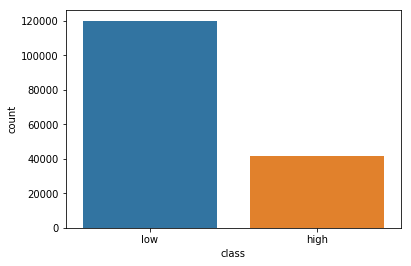

In [6]:
import seaborn as sns
sns.countplot(x='class',data=df)

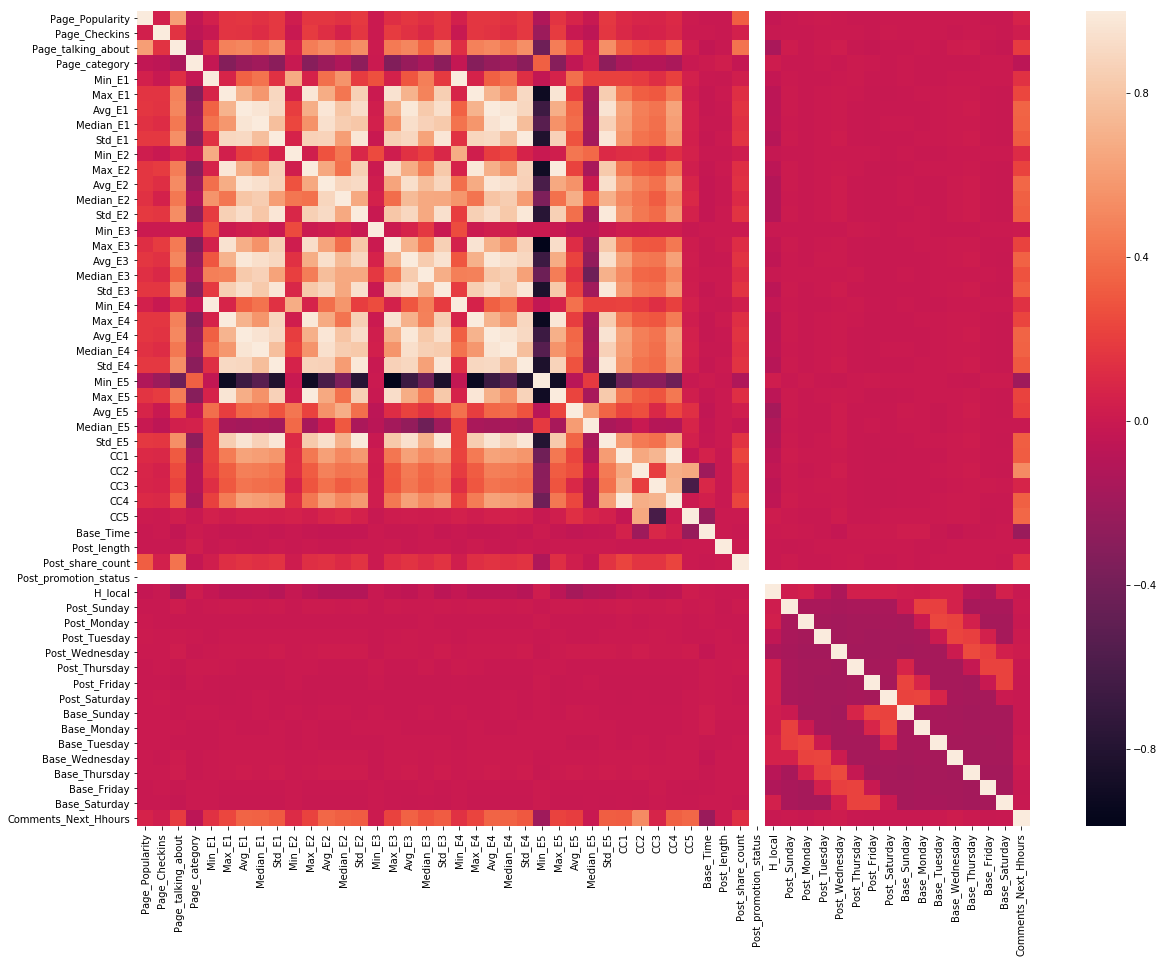

In [23]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr())

In [6]:
from sklearn.preprocessing import label_binarize
# low will be 0 and high will be 1
encoded_column_vector = label_binarize(df['class'], classes=['low','high']) 
encoded_labels = np.ravel(encoded_column_vector)

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:,0:53],encoded_labels, test_size = 0.3, random_state = 0)

In [21]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

In [22]:
xTrain_norm=normaliseData(xTrain)
xTest_norm=normaliseData(xTest)

In [190]:
xTrain_norm

array([[-0.16172497, -0.22451889,  0.30649628, ..., -0.42628547,
        -0.41276262, -0.40675286],
       [-0.20049688, -0.20110319, -0.38914367, ...,  2.34584582,
        -0.41276262, -0.40675286],
       [-0.1772673 , -0.16328515, -0.37057314, ..., -0.42628547,
         2.42270001, -0.40675286],
       ...,
       [ 1.37653675, -0.2244712 ,  1.79572997, ..., -0.42628547,
        -0.41276262, -0.40675286],
       [ 0.09747495, -0.22451889, -0.28367466, ..., -0.42628547,
        -0.41276262, -0.40675286],
       [-0.1742313 , -0.22451889,  0.07637354, ..., -0.42628547,
        -0.41276262, -0.40675286]])

In [23]:
#Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
#To suppres exponenetial form of decimal values
np.set_printoptions(suppress=True)
model = ExtraTreesClassifier()
model.fit(xTrain_norm,yTrain)
print(model.feature_importances_)

[0.00563773 0.00458203 0.0045628  0.00696344 0.00034905 0.01238954
 0.03801266 0.00809774 0.00883802 0.00032081 0.01984711 0.00706037
 0.00790225 0.01374698 0.00000464 0.0234445  0.02439177 0.0115872
 0.01707463 0.00045208 0.01749916 0.01253878 0.0096038  0.01910204
 0.01550838 0.00523879 0.00464973 0.00388644 0.00962261 0.0582141
 0.11004827 0.03814282 0.05215021 0.05710026 0.19357591 0.03353638
 0.04155413 0.         0.00306598 0.00686551 0.00714351 0.00717188
 0.00705247 0.00688504 0.00755653 0.00714159 0.00696677 0.00692493
 0.00694224 0.00759343 0.0074118  0.00704318 0.00699798]


In [192]:
arr=np.sort(model.feature_importances_,axis=None)
feature_index_arr=model.feature_importances_.argsort()[-10:][::-1]
feature_index_arr

array([34, 30, 33, 29, 32, 36, 35, 31, 21, 24])

In [193]:
for i in feature_index_arr:
    print(xTrain.columns[i])
    

Base_Time
CC2
CC5
CC1
CC4
Post_share_count
Post_length
CC3
Avg_E4
Min_E5


In [24]:
colsSelected=['Base_Time','CC2','CC5','Post_share_count','CC1','Post_length','CC4','CC3','Avg_E4','Min_E5']

In [25]:
xTest_sub,xTrain_sub=xTest[colsSelected],xTrain[colsSelected]
xTest_norm,xTrain_norm=normaliseData(xTest_sub),normaliseData(xTrain_sub)

In [26]:
xTrain_norm.shape

(112987, 10)

In [27]:
#Outlier Detection
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(xTrain_norm))
print(z)

[[0.97360898 0.31271473 0.46018181 ... 0.27002537 0.05436222 0.69684522]
 [1.5005758  0.15400697 0.86358244 ... 0.95685377 1.62822107 1.17936101]
 [1.02118945 1.80363127 1.65886597 ... 0.27002537 0.8561228  0.37253133]
 ...
 [1.06876993 0.90908135 0.93965547 ... 0.27002537 0.37607546 0.55822318]
 [1.45299532 0.23179392 0.01929186 ... 0.21609662 0.41062016 0.48703232]
 [0.88202961 0.06325552 0.20691199 ... 0.20185122 0.74534348 0.33298085]]


In [28]:
threshold = 3
print(np.where(z > 3))

(array([     6,      6,     13, ..., 112800, 112824, 112981]), array([2, 7, 8, ..., 8, 5, 9]))


In [29]:
xTrain_wo =xTrain_norm[(z < 3).all(axis=1)]
xTrain_wo.shape

(105826, 10)

In [30]:
yTrain.shape

(112987,)

In [31]:
#xTrain_wo =xTrain_norm[(z < 3).all(axis=1)]
yTrain=yTrain[(z < 3).all(axis=1)]
yTrain.shape

(105826,)

In [32]:
print('Outliers removed: ',xTrain_norm.shape[0]-xTrain_wo.shape[0])

Outliers removed:  7161


In [62]:
#Support Vector Machines
from sklearn import svm
clf=svm.LinearSVC(C=1.0,class_weight='balanced',
                     loss='squared_hinge',
                     max_iter=1000,
                     penalty='l2',
                     random_state=0)

In [204]:
from sklearn.metrics import accuracy_score,recall_score
clf.fit(xTrain_wo,yTrain)
y_pred=clf.predict(xTest_norm)
accuracy_score(yTest,y_pred)

0.8615676881143141

In [205]:
recall_score(yTest,y_pred)

0.8966760112134562

In [207]:
from sklearn import metrics
cm = metrics.confusion_matrix(yTest,y_pred)

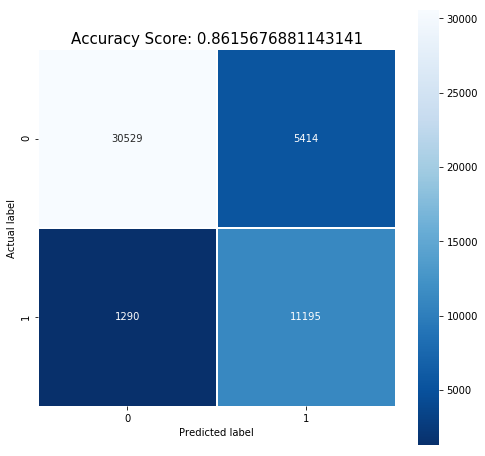

In [213]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

In [63]:
rbf_clf=svm.SVC(kernel='rbf',C=1.0,random_state=0)
rbf_clf.fit(xTrain_wo,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
y_pred=rbf_clf.predict(xTest_norm)
accuracy_score(yTest,y_pred)

0.8832786072734031

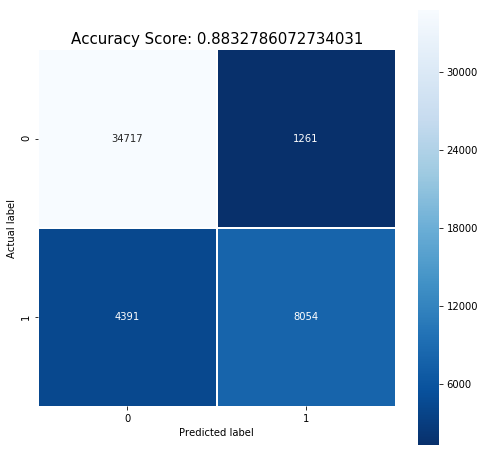

In [66]:
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

In [219]:
sigmoid_clf=svm.SVC(kernel='sigmoid',gamma=1.0,random_state=0)
sigmoid_clf.fit(xTrain_wo,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [220]:
y_pred=sigmoid_clf.predict(xTest_norm)
accuracy_score(yTest,y_pred)

0.7570000825968448

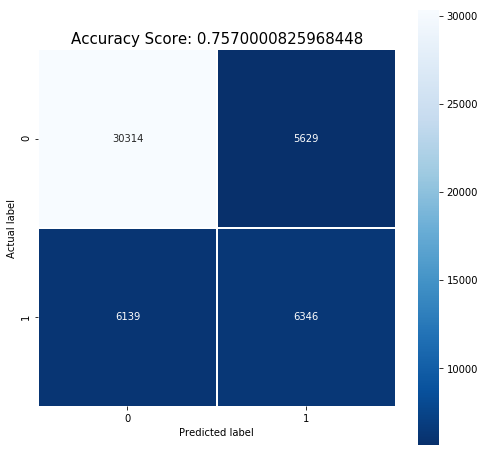

In [221]:
cm = metrics.confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

0.7570000825968448
0.7570000825968448
0.7570000825968448
0.7570000825968448
0.7570000825968448
0.7570000825968448


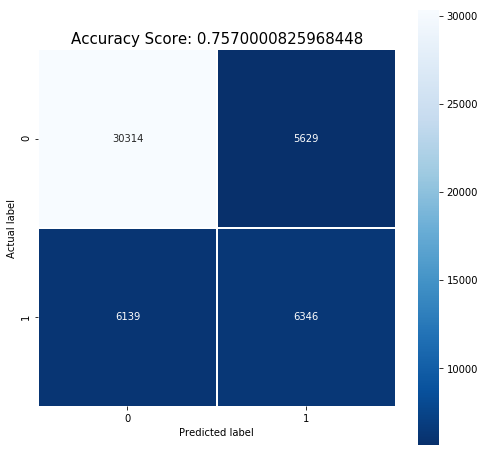

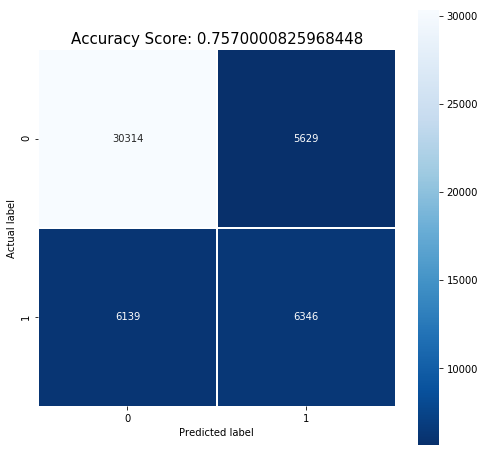

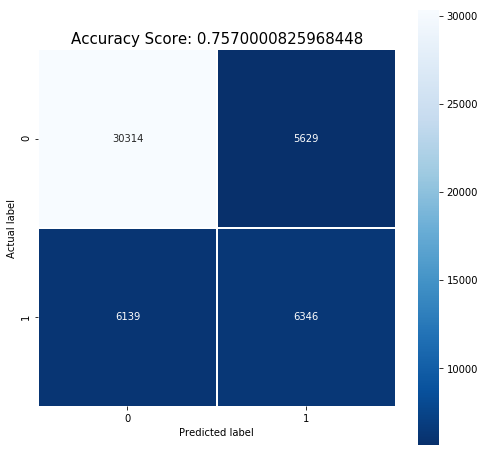

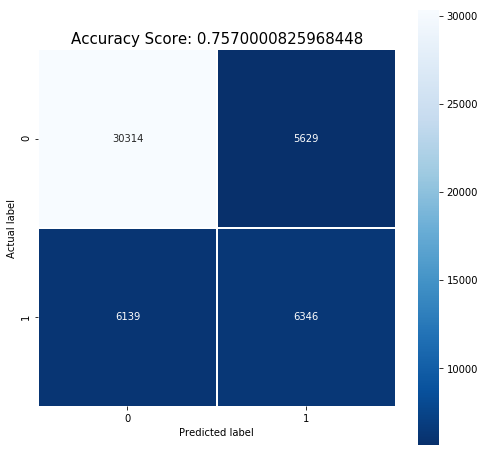

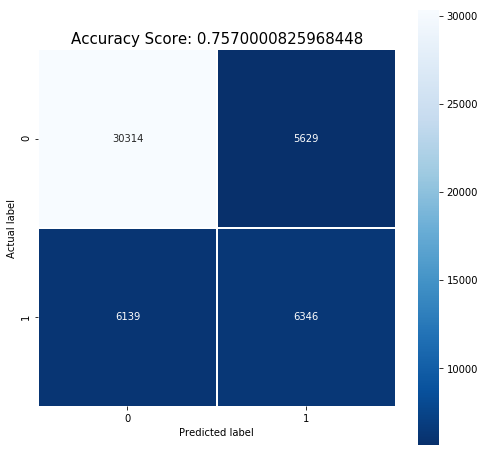

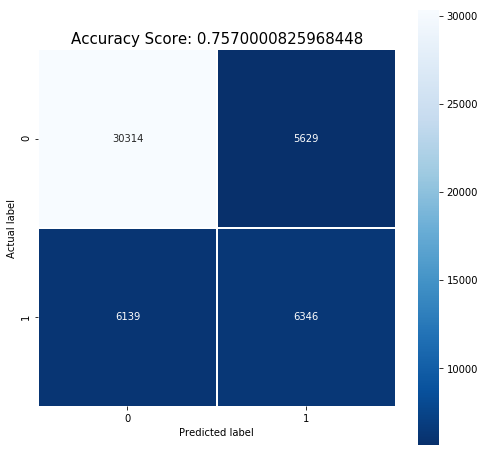

In [223]:
degrees = [1, 2, 3, 4, 5, 6]

for degree in degrees:
    poly_clf=svm.SVC(kernel='poly',degree=degree,random_state=0)
    poly_clf.fit(xTrain_wo,yTrain)
    y_pred=sigmoid_clf.predict(xTest_norm)
    print(accuracy_score(yTest,y_pred))
    cm = metrics.confusion_matrix(yTest,y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
    plt.title(all_sample_title, size = 15);


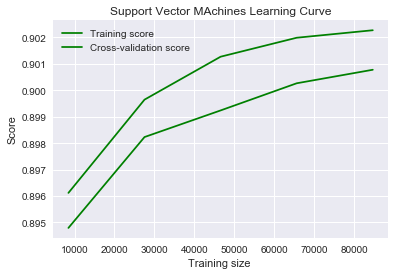

In [133]:
sns.set()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
train_sizes=np.linspace(.1, 1.0, 5)
trainSize, trainScores, testScores = learning_curve(
        rbf_clf,xTrain_wo,yTrain, cv=cv, n_jobs=2,train_sizes=train_sizes)
train_scores_mean = np.mean(trainScores, axis=1)
train_scores_std = np.std(trainScores, axis=1)
test_scores_mean = np.mean(testScores, axis=1)
test_scores_std = np.std(testScores, axis=1)
plt.plot(trainSize, train_scores_mean, 'g-',label="Training score")
plt.plot(trainSize, test_scores_mean, 'g-',label="Cross-validation score")
plt.title("Support Vector MAchines Learning Curve")
plt.xlabel('Training size ')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [67]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
min_samples_leaf=[30,100,300]
max_depth=[3,5,10]
dtree=DecisionTreeClassifier(criterion = "gini", 
                                    splitter = 'random', 
                                    max_leaf_nodes = 10, 
                                    min_samples_leaf = 5, 
                                    max_depth= 5)
dtree.fit(xTrain_wo,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [68]:
y_pred=dtree.predict(xTest_norm)
accuracy_score(yTest,y_pred)

0.8768560394853685

In [69]:
for min_sample in min_samples_leaf:
    dtree=DecisionTreeClassifier(criterion = "gini", 
                                    splitter = 'random', 
                                    max_leaf_nodes = 10, 
                                    min_samples_leaf = min_sample, 
                                    max_depth= 5)
    dtree.fit(xTrain_wo,yTrain)
    y_pred=dtree.predict(xTest_norm)
    print('With min_samples_leaf= ',min_sample,' accuracy is ',accuracy_score(yTest,y_pred))

With min_samples_leaf=  30  accuracy is  0.8928608305970304
With min_samples_leaf=  100  accuracy is  0.8884620944592446
With min_samples_leaf=  300  accuracy is  0.8622968424095987


In [227]:
for depth in max_depth:
    dtree=DecisionTreeClassifier(criterion = "gini", 
                                    splitter = 'random', 
                                    max_leaf_nodes = 10, 
                                    min_samples_leaf = 30, 
                                    max_depth= depth)
    dtree.fit(xTrain_wo,yTrain)
    y_pred=dtree.predict(xTest_norm)
    print('With max_depth= ',depth,' accuracy is ',accuracy_score(yTest,y_pred))

With max_depth=  3  accuracy is  0.887193359213678
With max_depth=  5  accuracy is  0.8894647724456926
With max_depth=  10  accuracy is  0.869848021805567


In [228]:
tree=DecisionTreeClassifier(criterion = "gini", 
                                    splitter = 'random', 
                                    max_leaf_nodes = 10, 
                                    min_samples_leaf = 30, 
                                    max_depth= 5)
dtree.fit(xTrain_wo,yTrain)
y_pred=dtree.predict(xTest_norm)
print('After experimentation, best accuracty obtained: ',accuracy_score(yTest,y_pred))

After experimentation, best accuracty obtained:  0.8852729825720658


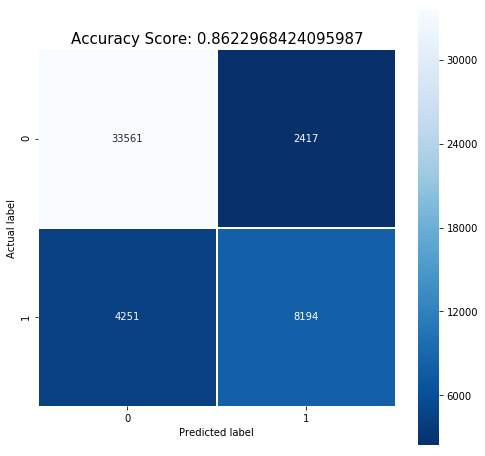

In [71]:
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

In [72]:
#Using GridSerachCV to select for parameters and 5 fold cross validation 
parameters={'min_samples_leaf':[30,100,300],'max_depth':[3,5,10],'max_leaf_nodes':[5,10,15]}
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters,cv=5,verbose=5,n_jobs=3)
clf.fit(xTrain_wo,yTrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:    8.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'min_samples_leaf': [30, 100, 300], 'max_depth': [3, 5, 10], 'max_leaf_nodes': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [73]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
clf.best_score_

0.8973503675845256

In [75]:
clf.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 30}

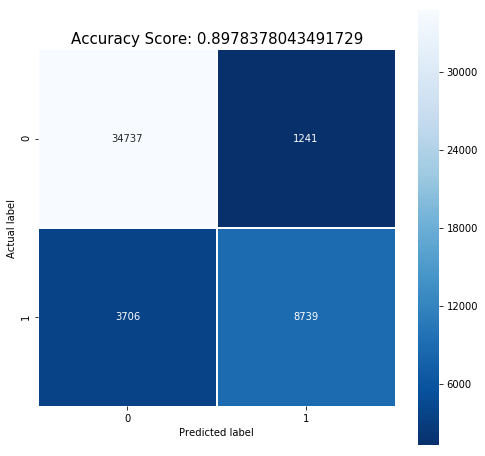

In [77]:
dt_gridcv=clf.best_estimator_
dt_gridcv.fit(xTrain_wo,yTrain)
y_pred=dt_gridcv.predict(xTest_norm)
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

In [243]:
print(classification_report(yTest,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93     35943
          1       0.83      0.77      0.80     12485

avg / total       0.90      0.90      0.90     48428



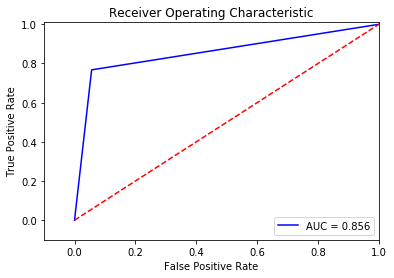

In [240]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(yTest, y_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [241]:
roc_auc

0.8556526675178564

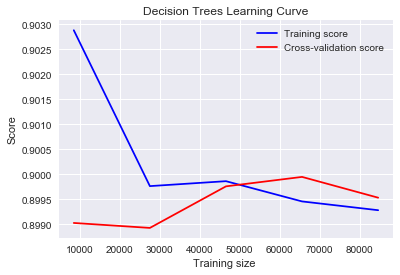

In [139]:
#Learning Curve
sns.set()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
train_sizes=np.linspace(.1, 1.0, 5)
trainSize, trainScores, testScores = learning_curve(
        dt_gridcv,xTrain_wo,yTrain, cv=cv, n_jobs=2,train_sizes=train_sizes)
train_scores_mean = np.mean(trainScores, axis=1)
train_scores_std = np.std(trainScores, axis=1)
test_scores_mean = np.mean(testScores, axis=1)
test_scores_std = np.std(testScores, axis=1)
plt.plot(trainSize, train_scores_mean, 'b-',label="Training score")
plt.plot(trainSize, test_scores_mean, 'r-',label="Cross-validation score")
plt.title("Decision Trees Learning Curve")
plt.xlabel('Training size ')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [33]:
#Light GBM
import lightgbm as lgb

In [2]:
lgb.__version__

'2.2.3'

In [119]:
lgbm_clf=lgb.LGBMClassifier(max_depth=2)

In [120]:
lgbm_clf.fit(xTrain_wo,yTrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=2,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [121]:
y_pred=lgbm_clf.predict(xTest_norm)
y_score=lgbm_clf.predict_proba(xTest_norm)[:,1]

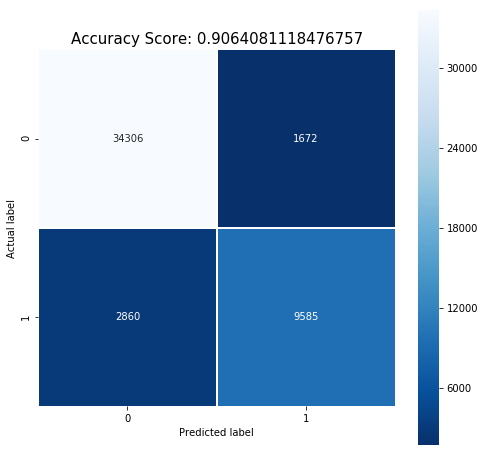

In [122]:
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

In [40]:
print(classification_report(yTest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     35978
           1       0.86      0.77      0.81     12445

   micro avg       0.91      0.91      0.91     48423
   macro avg       0.89      0.86      0.88     48423
weighted avg       0.91      0.91      0.91     48423



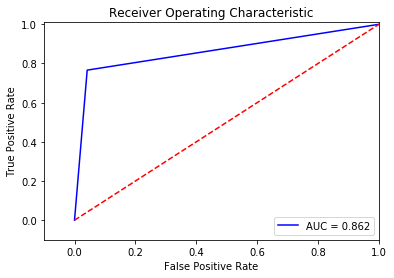

In [43]:
fpr, tpr, thresholds = roc_curve(yTest, y_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
#To use best parameters, RandomisedSearchCV is used with 5 fold cross validation
#Setting all parameters
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(xTest_norm,yTest)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [111]:
n_iter =2 
#intialize lgbm and lunch the search
lgbm_clf = lgb.LGBMClassifier(random_state=42, n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

grid_search.fit(xTrain_wo, yTrain, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.8s finished


Best score reached: 0.9102394496626538 with params: {'colsample_bytree': 0.6247240713084175, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_samples': 120, 'min_child_weight': 100.0, 'n_estimators': 2000, 'num_leaves': 24, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.5673991135726937} 


In [112]:
#Using the parameters obtained from RandomisedSearchCV to fit classifier using best estimator
lgbm_clf_best=grid_search.best_estimator_
lgbm_clf_best.fit(xTrain_wo,yTrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6247240713084175, importance_type='split',
        learning_rate=0.2, max_depth=4, min_child_samples=120,
        min_child_weight=100.0, min_split_gain=0.0, n_estimators=2000,
        n_jobs=4, num_leaves=24, objective=None, random_state=42,
        reg_alpha=10, reg_lambda=1, silent=True,
        subsample=0.5673991135726937, subsample_for_bin=200000,
        subsample_freq=0)

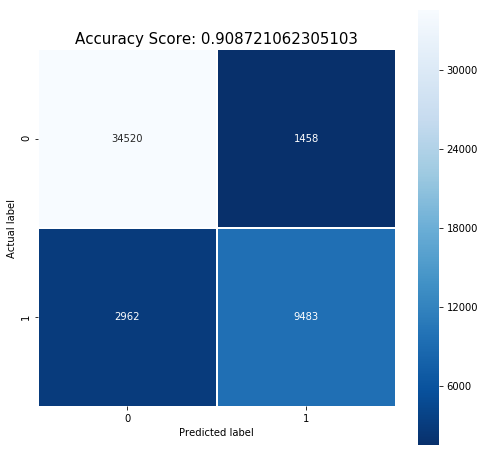

In [114]:
y_pred_best=lgbm_clf_best.predict(xTest_norm)
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred_best))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(yTest,y_pred_best)l)

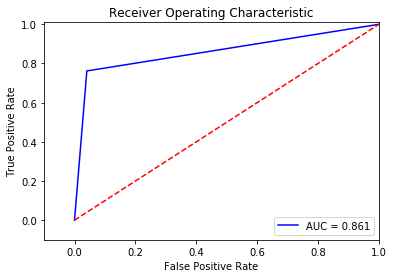

In [60]:
fpr, tpr, thresholds = roc_curve(yTest, y_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
roc_auc

0.8607340015228715

In [125]:
#Ensemble of SVM,Decision Tree and LightGBM:
from sklearn.ensemble import VotingClassifier
estimators=[('svm', rbf_clf), ('dt', dt_gridcv), ('lgbm', lgbm_clf_best)]
ensemble = VotingClassifier(estimators, voting='hard')

In [126]:
ensemble.fit(xTrain_wo,yTrain)
ensemble.score(xTest_norm,yTest)

0.9049418664684138

In [88]:
y_pred=ensemble.predict(xTest_norm)

In [89]:
print(classification_report(yTest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     35978
           1       0.88      0.73      0.80     12445

   micro avg       0.90      0.90      0.90     48423
   macro avg       0.90      0.85      0.87     48423
weighted avg       0.90      0.90      0.90     48423



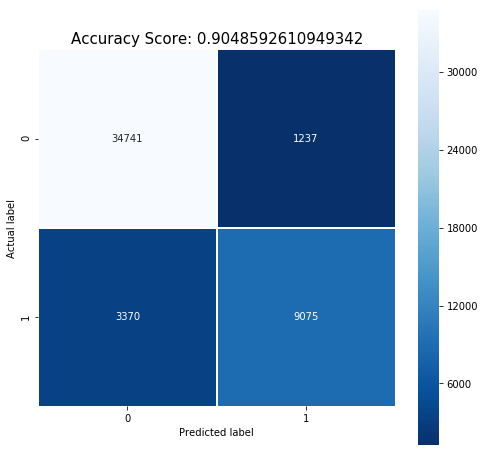

In [90]:
#Ensemble of SVM, Decision Tree and LightGBM performs better than individual SVM, individual Decision Tree and individual LightGBM.
cm=confusion_matrix(yTest,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yTest,y_pred))
plt.title(all_sample_title, size = 15);

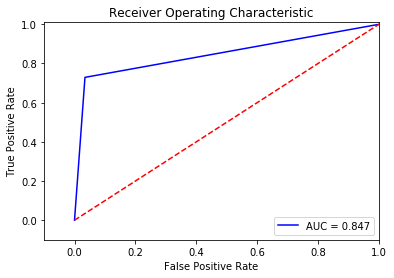

In [91]:
fpr, tpr, thresholds = roc_curve(yTest, y_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# plot_learning_curve(rbf_clf,dt_gridcv, lgbm_clf_best,ensemble,xTrain_wo,yTrain, cv=cv, n_jobs=2)

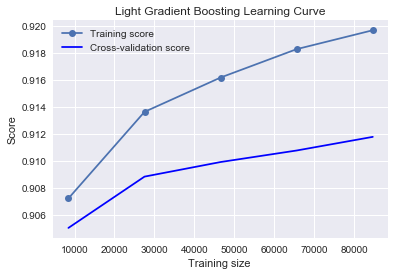

In [132]:
sns.set()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
train_sizes=np.linspace(.1, 1.0, 5)
trainSize, trainScores, testScores = learning_curve(
        lgbm_clf_best,xTrain_wo,yTrain, cv=cv, n_jobs=2,train_sizes=train_sizes)
train_scores_mean = np.mean(trainScores, axis=1)
train_scores_std = np.std(trainScores, axis=1)
test_scores_mean = np.mean(testScores, axis=1)
test_scores_std = np.std(testScores, axis=1)
plt.plot(trainSize, train_scores_mean, 'o-',label="Training score")
plt.plot(trainSize, test_scores_mean, 'b-',label="Cross-validation score")
plt.title("Light Gradient Boosting Learning Curve")
plt.xlabel('Training size ')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")
plt.show()